# Introduction

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv('/content/drive/MyDrive/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


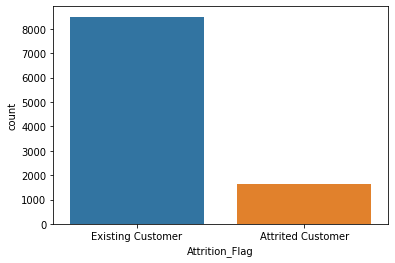

In [4]:
sns.countplot('Attrition_Flag',data=df)

Text(0, 0.5, 'Frequency')

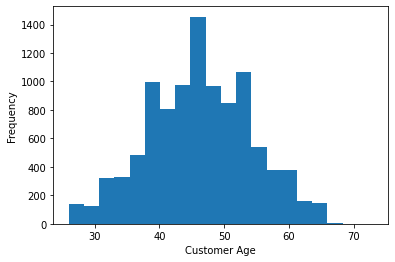

In [5]:
plt.hist(df['Customer_Age'],bins=20)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


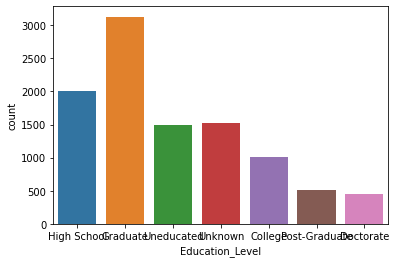

In [6]:
sns.countplot('Education_Level', data=df)

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


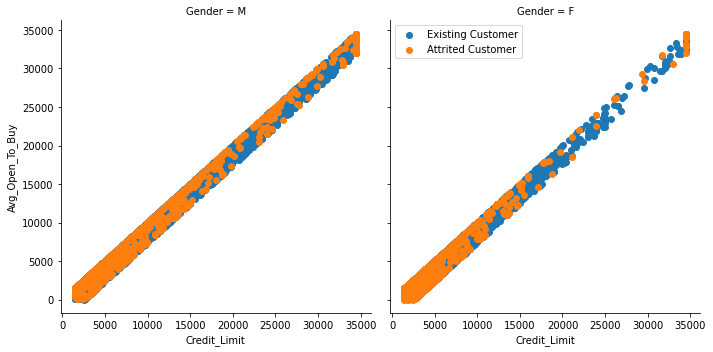

In [8]:
a=sns.FacetGrid(df,col='Gender',hue='Attrition_Flag',margin_titles=True,height=5)
a.map(plt.scatter,'Credit_Limit','Avg_Open_To_Buy')
plt.legend(loc='best')

# Data Prepropcessing

In [9]:
# drop unnecessary column

df.drop(list(df.columns[[0,-1,-2]]),axis=1,inplace=True)

In [10]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [12]:
def income_transform(dataframe):
  a=dataframe.Income_Category.apply(lambda x: re.findall(r'\d{2,3}',x))
  for index,num in enumerate(a):
    if len(num)==0:
      dataframe.Income_Category.iloc[index]=0
    else:
      income=[int(i) for i in num]
      dataframe.Income_Category.iloc[index]=np.mean(income)
  return dataframe

In [13]:
df2=income_transform(df)
df2.rename(columns={'Income_Category':'Average_Income'},inplace=True)
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Average_Income,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,70,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,40,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,100,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,40,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,70,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
df2.Average_Income=df2.Average_Income.astype('int')

In [15]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [16]:
df2.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

df2.Education_Level.replace({'Unknown':0,'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5},inplace=True)
col_tran=ColumnTransformer([('ohe',OneHotEncoder(),[2,5,7])])
col_array=col_tran.fit_transform(df2)
name=[i.split('_')[3] for i in col_tran.get_feature_names()]
# categorical features
df3=pd.DataFrame(col_array,columns=name)
df3.head()

,F,M,Divorced,Married,Single,Unknown,Blue,Gold,Platinum,Silver
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
#numerical feature

num_df=df2.drop(['Attrition_Flag','Gender','Marital_Status','Card_Category'],axis=1)
num_df.head()

,Customer_Age,Dependent_count,Education_Level,Average_Income,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,1,70,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,3,40,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,3,100,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,1,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,0,70,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

x=pd.concat([df3,num_df],axis=1)
y=df2.Attrition_Flag.replace({'Existing Customer':0,'Attrited Customer':1})

In [20]:
ss_split=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=0)

for train_index,test_index in ss_split.split(x,y):
  x_train,x_test=x.iloc[train_index],x.iloc[test_index]
  y_train,y_test=y[train_index],y[test_index]

In [21]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

# Bagging and Boosting

The three most popular methods for combining the predictions from different models are:

1. Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.

2. Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

3. Voting. Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

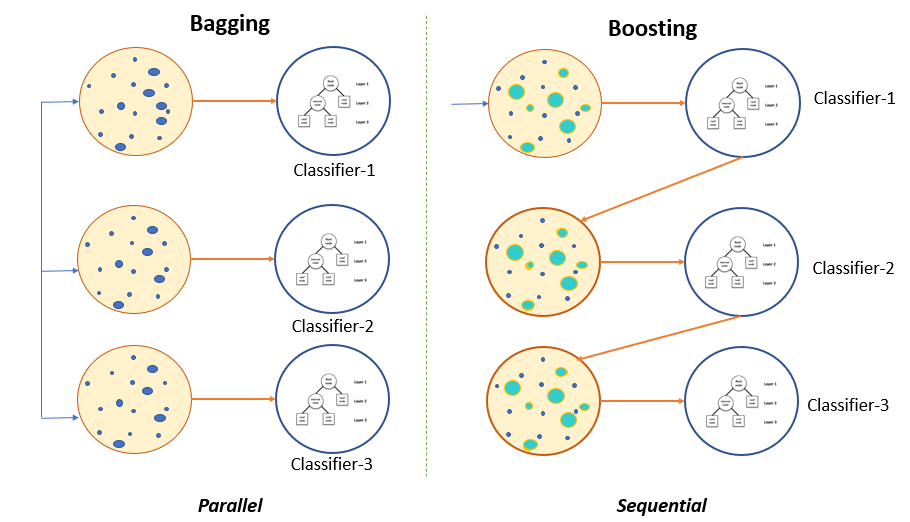

**Bagging (Bootstrap Aggregating)**

The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result.

Here’s a question: If you create all the models on the same set of data and combine it, will it be useful? 

There is a high chance that these models will give the same result since they are getting the same input. So how can we solve this problem? One of the techniques is bootstrapping.

Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, **with replacement**.

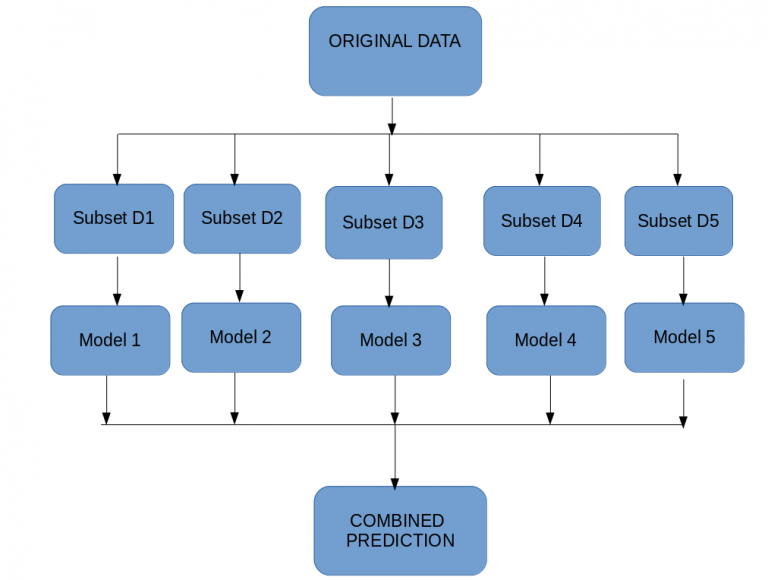

In [22]:
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(max_depth=20,min_samples_split=100,random_state=0)
Bag_model=BaggingClassifier(tree_model,n_estimators=15,bootstrap=True,oob_score=True)

Bag_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=20,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=100,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
   

Text(33.0, 0.5, 'Prediction')

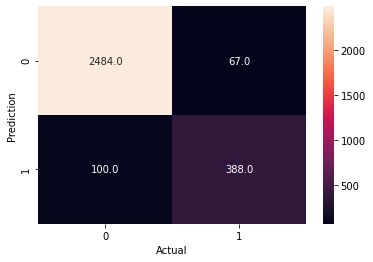

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

Bag_prediction=Bag_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,Bag_prediction),annot=True,fmt='.1f')
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [24]:
print(classification_report(y_test,Bag_prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2551
           1       0.85      0.80      0.82       488

    accuracy                           0.95      3039
   macro avg       0.91      0.88      0.90      3039
weighted avg       0.94      0.95      0.94      3039



In [25]:
Bag_model.score(x_test,y_test)

0.9450477130635078

Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set.

You can evaluate the ensemble itself by averaging out the oob evaluations of each predictor

In [26]:
Bag_model.oob_score_

0.9424379232505643

**Boosting**

Boosting(originally called  hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. 

The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. 

There are many boosting methods available, but by far the most popular are AdaBoost (short for  Adaptive Boosting) and  Gradient Boosting.

1. AdaBoost

AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

-Increase the weight will lead the sample have higher chance to be selected.

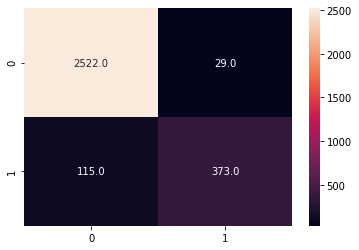

In [27]:
from sklearn.ensemble import AdaBoostClassifier

#the misclassified instance weights are boosted half as much at every iteration (learning rate=0.5)
adaboost=AdaBoostClassifier(tree_model,random_state=0,n_estimators=15,learning_rate=0.5)
adaboost.fit(x_train,y_train)
ada_prediction=adaboost.predict(x_test)
sns.heatmap(confusion_matrix(y_test,ada_prediction),annot=True,fmt='.1f')

In [28]:
print(classification_report(y_test,ada_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.93      0.76      0.84       488

    accuracy                           0.95      3039
   macro avg       0.94      0.88      0.91      3039
weighted avg       0.95      0.95      0.95      3039



In [29]:
adaboost.score(x_test,y_test)

0.9526159921026653

2. Gradient Boosting

Compare with AdaBoost,instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the  residual errorsmade by the previous predictor

**The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as  0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. 
This is a regularization technique called  shrinkage**

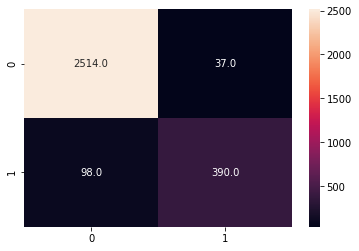

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

Grad_boost=GradientBoostingClassifier(random_state=0,n_estimators=15,learning_rate=0.5)
Grad_boost.fit(x_train,y_train)
Grad_prediction=Grad_boost.predict(x_test)
sns.heatmap(confusion_matrix(y_test,Grad_prediction),annot=True,fmt='.1f')

In [31]:
print(classification_report(y_test,Grad_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.91      0.80      0.85       488

    accuracy                           0.96      3039
   macro avg       0.94      0.89      0.91      3039
weighted avg       0.95      0.96      0.95      3039



In [32]:
Grad_boost.score(x_test,y_test)

0.9555774925962488

3. XGBoost

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. 

XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

**Since XGBoost takes care of the missing values itself, you do not have to impute the missing values**

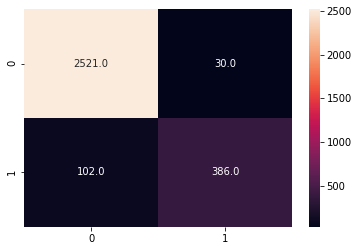

In [33]:
import xgboost as xgb

xg_boost=xgb.XGBClassifier(learning_rate=0.5,n_estimators=15,random_state=0)
xg_boost.fit(x_train,y_train)
xg_boost_prediction=xg_boost.predict(x_test)
sns.heatmap(confusion_matrix(y_test,xg_boost_prediction),annot=True,fmt='.1f')

In [34]:
print(classification_report(y_test,xg_boost_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.93      0.79      0.85       488

    accuracy                           0.96      3039
   macro avg       0.94      0.89      0.91      3039
weighted avg       0.96      0.96      0.96      3039



In [35]:
xg_boost.score(x_test,y_test)

0.9565646594274433

4. Light GBM

**Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.**

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern. The images below will help you understand the difference in a better way.

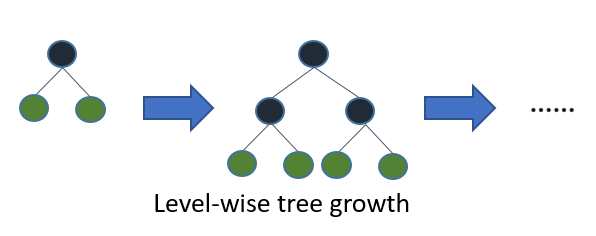

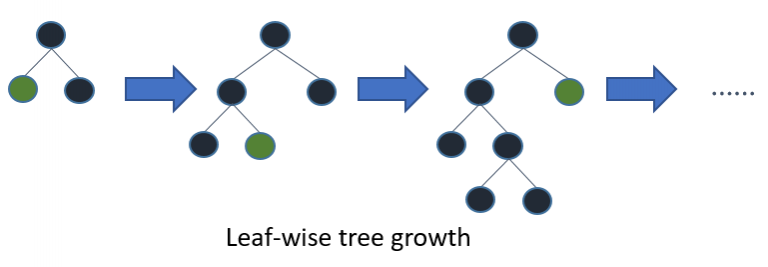

In [44]:
import lightgbm as lgb

# num_leaves = 2^(max_depth)

lgb_model=lgb.LGBMClassifier(learning_rate=0.5,n_estimators=15,random_state=0)
lgb_model.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=15, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

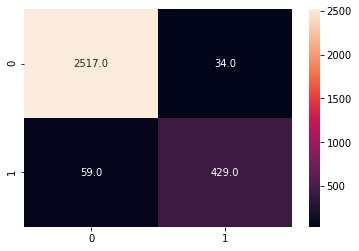

In [45]:
lgb_prediction=lgb_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,lgb_prediction),annot=True,fmt='.1f')

In [46]:
print(classification_report(y_test,lgb_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2551
           1       0.93      0.88      0.90       488

    accuracy                           0.97      3039
   macro avg       0.95      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039



In [47]:
lgb_model.score(x_test,y_test)

0.9693978282329714

In [58]:
model_score={'model':['Bag_model','adaboost','Grad_boost','xg_boost','lgb_model'],'score':[]}

for i in (Bag_model,adaboost,Grad_boost,xg_boost,lgb_model):
  model_score['score'].append(i.score(x_test,y_test))

In [59]:
model_score

{'model': ['Bag_model', 'adaboost', 'Grad_boost', 'xg_boost', 'lgb_model'],
 'score': [0.9450477130635078,
  0.9526159921026653,
  0.9555774925962488,
  0.9565646594274433,
  0.9693978282329714]}

Text(0.5, 1.0, 'Bagging and Boosting model performance')

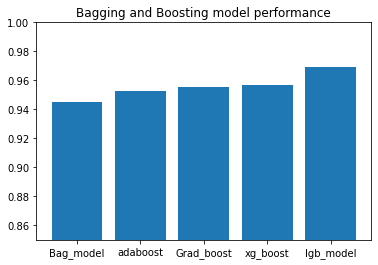

In [64]:
plt.bar(model_score['model'],model_score['score'])
plt.ylim((0.85,1.0))
plt.title('Bagging and Boosting model performance')